## Week 4: Kernels, Support Vector Machines

### Part I: Kernels 

#### Exercise 1. A complex dataset

Consider the dataset given below. We want to learn a classifier for this data, by relying on the $\ell_2$ loss.  

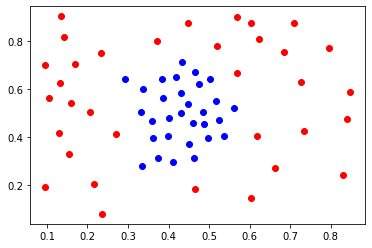

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
pointsClass1 = loadmat('KernelPointsEx1class1.mat')['PointsEx1class1']
pointsClass2 = loadmat('KernelPointsEx1class2.mat')['PointsEx1class2']


plt.scatter(pointsClass1[:,0], pointsClass1[:,1], c='r')
plt.scatter(pointsClass2[:,0], pointsClass2[:,1], c='b')
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures


# total number of points
num_points = np.shape(pointsClass1)[0] + np.shape(pointsClass2)[0]


# grouping the data 
data = np.vstack((pointsClass1, pointsClass2))
target_class1 = np.ones((np.shape(pointsClass1)[0], 1))
target_class2 = -np.ones((np.shape(pointsClass2)[0], 1))
# defining +1/-1 targets
target = np.vstack((target_class1, target_class2))

# generate phi(x) from polynomial features
my_features = PolynomialFeatures(10)
featureMatrix = my_features.fit_transform(data)

# defining kernel 

K = np.zeros((np.shape(featureMatrix)[0], np.shape(featureMatrix)[0]))

for i in np.arange(np.shape(featureMatrix)[0]):
    
    for j in np.arange(np.shape(featureMatrix)[0]):
        
        K[i,j] = np.dot(featureMatrix[i],featureMatrix[j])

    
lbda = np.zeros((np.shape(featureMatrix)[0], 1))
        
eta = .1

# we then compute the lambda_i's from the original gradient 
# updates in which we substituted beta = sum_i lambda_i phi(x^i)
    
current_iter = 0
maxIter = 500
while current_iter < maxIter:
    
    lbda = lbda + (eta/np.shape(featureMatrix)[0])*(target -\
                                                    np.matmul(K, lbda))
    current_iter +=1    

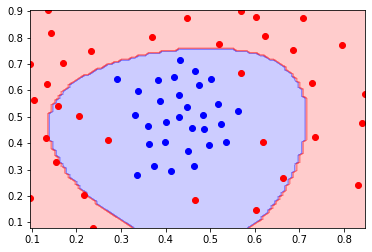

In [19]:
# once we have the lambda, the classifier is defined as 


# y(x) = \sum_i=1^n lambda_i K(x_i, x)

# which follows from y(x) = beta^T phi(x) and 
# beta  = sum_i lambda_i phi(x_i)

# generate the limits of the data space 
xmin1 = np.min(data[:,0])
xmax1 = np.max(data[:,0])
xmin2 = np.min(data[:,1])
xmax2 = np.max(data[:,1])

# for each dimension in data space, I generate 100 points 
# between the min and the max values

x1 = np.linspace(xmin1, xmax1, 100)
x2 = np.linspace(xmin2, xmax2, 100)

# from those values, generate the grid 
xx1, xx2 = np.meshgrid(x1, x2)

# reshape the grid into a data matrix
# where column 1 is first coordinate, column 2 is second coordinate

grid_data = np.vstack((xx1.flatten(), xx2.flatten())).T

# generate phi(x) for each grid point
grid_data_featureVectors = my_features.fit_transform(grid_data)

# compute the result of the classification and color the result in 
# red and blue

prediction = np.zeros((np.shape(grid_data)[0], 1))
    
    
# the prediction for a new point x is given by 
# y(x) = \sum_{i=1}^N lambda_i <phi(x^i), phi(x)>
    
for j in range(np.shape(grid_data_featureVectors)[0]):
    
    prediction[j] = 0
    
    for i in range(np.shape(featureMatrix)[0]):
        
        prediction[j]+=lbda[i]*np.dot(featureMatrix[i,:],\
                                   grid_data_featureVectors[j,:])
        

        
# Display the final prediction 

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(["#0000FF", "#FF0000"])

plt.contourf(xx1, xx2, prediction.reshape(np.shape(xx1))>0, 
             cmap = cm_bright,alpha = .2, )
plt.scatter(pointsClass1[:,0], pointsClass1[:,1], c='r')
plt.scatter(pointsClass2[:,0], pointsClass2[:,1], c='b')
plt.show()


#### Exercise 1.1 Gradient updates on the dual formulation

Start by generating polynomial features using the function 'sklearn.preprocessing.PolynomialFeatures' from scikit learn. By relying on the kernel trick, starting from the $\ell_2$ (OLS) loss, derive the dual formulation (optimization problem on the coefficients $\lambda_i$ that are used to express the weight vector $\beta$ as the combination $\beta$). Once you have that loss, find the optimal coefficients $\lambda^*$ through gradient updates. 

In [ ]:
# put your code here 



#### Exercise 1.2 Final Models

Using the optimal coefficients, derive the classifier $y(\mathbf{x}) = \mathbf{\beta}^T\mathbf{\phi}(\mathbf{x})$, expressing the weight vector $\mathbf{\beta}$ as the combination $\mathbf{\beta} = \sum_{i=1}^N \lambda_i^* \mathbf{\phi}(\mathbf{x}^{(i)})$. Then display the boundary by using meshgrid. 

#### Exercise 2 A disconnected dataset. 

We want to increase the difficulty of the problem. Use your implementation of descent algorithm to learn a classifier for the dataset below. Progressively increase the number of features (i.e. increase the degree) and keep in mind that there is often and efficient way to compute the Kernel matrix. 

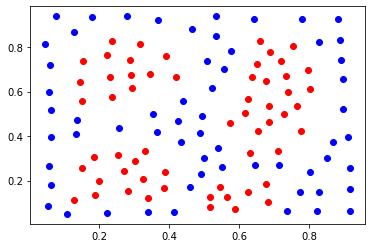

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
pointsClass1 = loadmat('KernelPointsEx2class1.mat')['PointsEx2class1']
pointsClass2 = loadmat('KernelPointsEx2class2.mat')['PointsEx2class2']


plt.scatter(pointsClass1[:,0], pointsClass1[:,1], c='r')
plt.scatter(pointsClass2[:,0], pointsClass2[:,1], c='b')
plt.show()

#### Exercise 3. From polynomial features to the Gaussian kernel

Use your gradient descent iterations on the $\mathbf{\lambda}_i$ to learn a classifier for the dataset below by relying on the Gaussian kernel. 

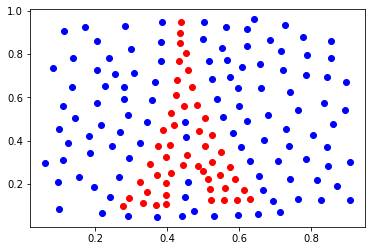

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
pointsClass1 = loadmat('KernelPointsEx3class1 (1).mat')['PointsEx3class1']
pointsClass2 = loadmat('KernelPointsEx3class2 (1).mat')['PointsEx3class2']


plt.scatter(pointsClass1[:,0], pointsClass1[:,1], c='r')
plt.scatter(pointsClass2[:,0], pointsClass2[:,1], c='b')
plt.show()


data = np.vstack((pointsClass1, pointsClass2))
targets = np.vstack((np.ones((np.shape(pointsClass1)[0], 1)),
                     -np.ones((np.shape(pointsClass2)[0], 1))))


# exp(-||x^i - x^j||/sigma)



In [64]:
# defining the kernel 

sigma = .005

K = np.zeros((np.shape(data)[0], np.shape(data)[0]))

# defining the kernel

for i in range(np.shape(data)[0]):
    for j in range(np.shape(data)[0]):
        
        K[i,j] = np.exp(-np.linalg.norm(data[i,:] - data[j,:])**2/sigma)

lbda = np.zeros((np.shape(data)[0],1))

maxIter = 8000

eta = .01
numIter = 1
while numIter<maxIter:
    
    lbda = lbda + \
    (eta/np.shape(data)[0])*(targets - np.matmul(K, lbda))
    
    numIter+=1

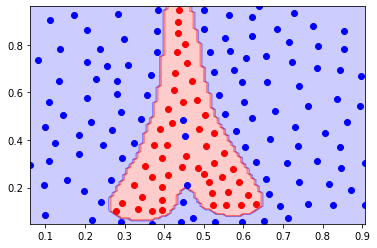

In [65]:
xmin1 = np.min(data[:,0])
xmax1 = np.max(data[:,0])
xmin2 = np.min(data[:,1])
xmax2 = np.max(data[:,1])

# for each dimension in data space, I generate 100 points 
# between the min and the max values

x1 = np.linspace(xmin1, xmax1, 100)
x2 = np.linspace(xmin2, xmax2, 100)

# from those values, generate the grid 
xx1, xx2 = np.meshgrid(x1, x2)

# reshape the grid into a data matrix
# where column 1 is first coordinate, column 2 is second coordinate

grid_data = np.vstack((xx1.flatten(), xx2.flatten())).T

prediction = np.zeros((np.shape(grid_data)[0], 1))
    
    
for j in range(np.shape(grid_data)[0]):
    
    prediction[j] = 0
    
    for i in range(np.shape(data)[0]):
        
        # y(x) = beta^T x = sum_i lambda_i phi(x_i)^T phi(x)
        # y(x) = sum_i lambda_i K(x^i, x)
        # y(x) = sum_i lambda_i exp(-||x^i - x||^2/sigma)
        prediction[j]+=lbda[i]*\
        np.exp(-np.linalg.norm(data[i,:]\
                                   - grid_data[j,:])**2/sigma)
        
# Display the final prediction 

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(["#0000FF", "#FF0000"])

plt.contourf(xx1, xx2, prediction.reshape(np.shape(xx1))>0, 
             cmap = cm_bright,alpha = .2, )
plt.scatter(pointsClass1[:,0], pointsClass1[:,1], c='r')
plt.scatter(pointsClass2[:,0], pointsClass2[:,1], c='b')
plt.show()


#### Exercise 4. 

Kernels are particularly useful in protein classification. When considering the classification of proteins, one approach is to rely on homology (i.e. evolutionary similarity). The problem can be recast as a supervised learning problem where proteins are seen as a set of labeled samples (positive if they are in a particular family, negative otherwise). Consider the dataset given below. Load this dataset using the pandas lines below. The dataset contains a set of 2000 sequence over the nucleotides A,T,C,G. Those sequences encode particular proteines which are classified in two groups represented by 0/1 targets stored in the file 'trainTargets.csv'.

In [1]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
train_data = pd.read_csv("train.csv")
train_targets = pd.read_csv("trainTargets.csv")

A simple approach (see Leslie et al 2002) when considering proteine classification is to use the spectrum kernel. Given sequences of characters from an alphabet $\mathcal{A}$, of length $|\mathcal{A}| = \ell$, the k-spectrum of an input sequence is the set of all the $k$-length (contiguous) subsequences that it contains. The feature map is then indexed by all possible subsequences $a$ of length $k$ from the alphabet $\mathcal{A}$. Formally, we define a feature map from $\mathcal{X}$ to $\mathbb{R}^{\ell^k}$ by 
\begin{align*}
\Phi_k(x) = (\phi_a(x))_{a\in \mathcal{A}^k}
\end{align*}
where $\phi_a(x)$ encodes the number of times that the subsequence $a$ occurs in $x$. The $k$-spectrum kernel is then defined as
\begin{align*}
K_k(\boldsymbol x, \boldsymbol y) = \langle \Phi_k(\boldsymbol x), \Phi_k(\boldsymbol y) \rangle 
\end{align*}

Note that while the feature space is large even for fairly small values of $k$, the feature vectors are sparse: the number of non-zero coordinates is bounded by length(x)-k+1 (i.e. we have at most length(x)-k+1 sequences of length k). This property allows for various efficient approaches for computing kernel values. 

A particularly efficient approach is to build a suffic tree for the collection of $k$-length subsequences of $x$ and $y$ obtained by moving a $k$ length sliding window across each of $x$ and $y$. At each depth $k$, we store two counts: one representing the number of times a k-length ubsequence of x ends at the leaf, the other representing the same count for y. Such a tree has depth $O(kn)$. Moreover, once it is built, the entry $K(x,y)$ can be computed by running through the leafs and summing the products of the subsequence counts for $x$ and $y$

An example of a suffix tree is given below.

<img src="suffixTree.png" width=300 height=2000 />

#### Exercise 4.1. 
Implement the Spectrum kernel below

In [ ]:
import numpy as np



### Part II : Maximizing the margin

#### Exercise 1. The hinge loss

Consider the dataset below. We would like to learn a classifier for this dataset that maximizes the margin (i.e. such that the distance between the closest points to the plane is maximized). We have seen that one can solve this problem by means of the constrained formulation

\begin{align*}
\min_{\mathbf{\beta}} \quad & \|\mathbf{\beta}\|^2 \\
\text{subject to} \quad & y(\mathbf{x}^{(i)})t^{(i)} \geq 1 
\end{align*}

where $y(\mathbf{x}^{(i)}) = \mathbf{\beta}^T\mathbf{x}^{(i)} + \beta_0$. We might sometimes want to use a (softer) unconstrained formulation. in particular, when selecting this option, we can use the following function known as the _Hinge loss_ 

\begin{align*}
\max(0, 1-t^{(i)}y(\mathbf{x}^{(i)})) = \max(0, 1-t^{(i)}(\mathbf{\beta}^T\mathbf{x}^{(i)}+\beta_0))
\end{align*}

For such a loss, we can derive a softer, unconstrained version of the problem as 

\begin{align*}
\min_{\mathbf{\beta}} \quad & \|\mathbf{\beta}\|^2 + \frac{C}{N}\sum_{i=1}^N \max(0, 1-t^{(i)}(\mathbf{\beta}^T\mathbf{x}^{(i)}+\beta_0))
\end{align*}

In short we penalize a point, only if this point lies on the wrong side of the plane.

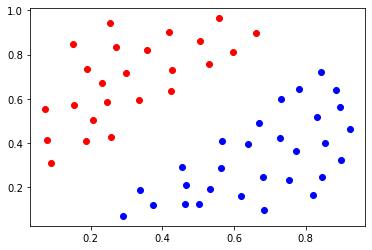

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
pointsClass1 = loadmat('KernelPointsEx4class1.mat')['PointsEx4class1']
pointsClass2 = loadmat('KernelPointsEx4class2.mat')['PointsEx4class2']


plt.scatter(pointsClass1[:,0], pointsClass1[:,1], c='r')
plt.scatter(pointsClass2[:,0], pointsClass2[:,1], c='b')
plt.show()

#### Exercise 1.1 

Start by completing the function below which should return the value and gradient of the hinge loss at a point $\mathbf{x}^{(i)}$. What is the gradient of the hinge loss?

In [ ]:
def HingeLoss(x):
    
    '''Returns the value and gradient of the hinge 
    loss at the point x'''
    
    
    
    return value, gradient

#### Exercise 1.2

Once you have the function, implement a function HingeLossSVC that takes as innput a starting weight vector $\mathbf{\beta}$ and intercept $\beta_0$ as well as the set of training points and a value for the parameter $C$ and returns the maximum margin classifier.  

In [ ]:
def HingeLossSVC(beta_init, beta0_init training, C):
    
    '''Returns the maximal margin classifier for the 
    training dataset'''
    
    
    
    
    
    return beta, beta0

#### Exercise 2. 

We now would like to find a maximal margin classifier based on the Gaussian kernel. Write the dual formulation and use the Kernel trick to replace the inner product of the feature vectors with the (Gaussian) Kernel matrix. The dual formulation is quadratically constrained program. In order to solve this problem, we will rely on the [CVXOPT](https://cvxopt.org/) library. You can install this library from the terminal using the line 'pip install cvxopt'  

CVXOPT provides a [quadratic solver](https://cvxopt.org/examples/tutorial/qp.html) which is defined by means of 6 matrices $Q, p, G, h, A, b$ which define the problem to be solved as 

\begin{align*}
\text{minimize} \quad & \frac{1}{2} \mathbf{x}^T\mathbf{P}\mathbf{x} + \mathbf{q}^T\mathbf{x}\\
\text{subject to}\quad  & \mathbf{G}\mathbf{x} \preceq h\\
&\mathbf{A}\mathbf{x} = \mathbf{b}
\end{align*}

Here the notation $\mathbf{x}\preceq 0$ is used to indicate that every entry of the vector $\mathbf{x}$ has to be non negative

#### Exercise 2.1 The gaussian kernel 

Start by providing the definition of the Gaussian kernel in order to define the matrix $\mathbf{P}$

In [ ]:
import numpy as np


def GaussianKernel(training, sigma):
    
    '''should return the kernel matrix K whose 
    entry K_ij is defined as K(x_i, x_j) = exp(-||x_i - x_j||^2/(2*sigma^2))'''
    
    
    return K

#### Exercise 2.2 Solving the QCQP

Relying on the dual formulation and on the Gaussian kernel, provide a sensible definition for each of the matrices $Q, p, G, h, A, b$ and solve the quadratic program using CVXOPT.

In [ ]:
import numpy as np
from cvxopt import matrix, solvers